# Support Vector Machine (SVM) - Theory

## Introduction

__Support Vector Machine (SVM)__ is the best known supervised learning algorithm. The SVM can be used for both classification and regression problems. It was developed by AT&T Bell Laboratories by Vladimir Naumovich Vapnik and his colleagues in the 1990s. It one of the most robust prediction methods, baswed on the statistical leanring framework. 

Suppose you are given plot of two label classes on graph as shown in image (A). Can you decide a separating line for the two classes?
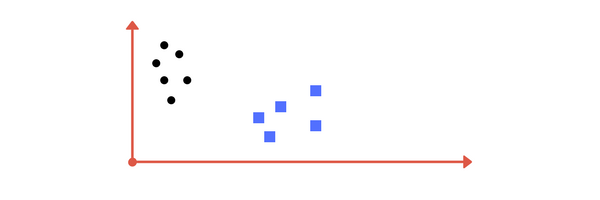

You might have come up to something similar as shown in image (B). It fairly separates the two classes. Any point that is left of the line falls into black circle class and on the right falls into blue square class. The objective of the support vector machine algorithm is to __find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points__. 
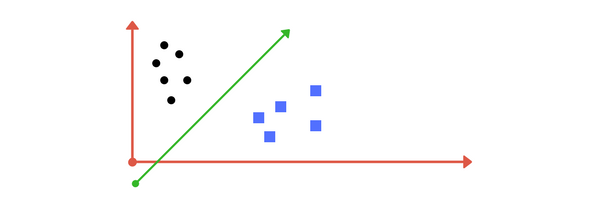

## Making It a Bit Complex

Now consider, what if we had data points as shown in the image below? Clearly, there's no line that can separate the two classes in the x-y plane. To solve this, we apply transformation nd add one more dimension as we call it z-axis. Let's assume value of points on z plane, $w = x^2 + y^2$. In this case, we can manipulate it as distance of point from z-origin. Now if we plot in z-axis, a clear separation is visible and a line can be drawn.
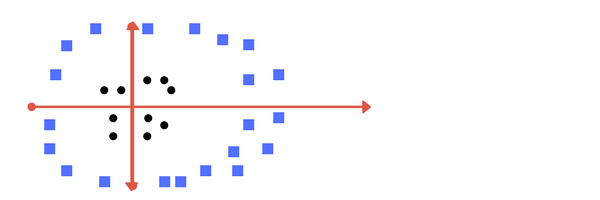
Can you draw a separating line in this?

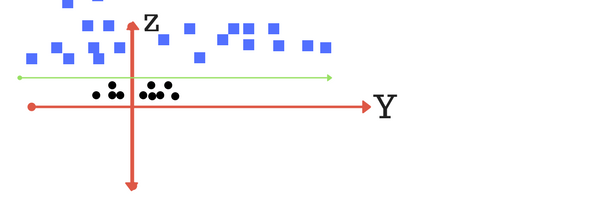
Plot of zy axis. Here, a separation line can be drawn.

When we transform this line back to its original plane, it maps to circular boundary as shown in the image below. These transformations are called __kernels__. 
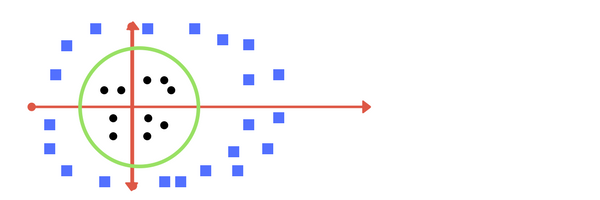
Transforming back to x-y plane, a line transforms to circle.

## Making It a Little More Complex

What if data plot overlaps? Or, what in case some of the black points are inside the blue squares? Which line mong 1 or 2 should we draw?
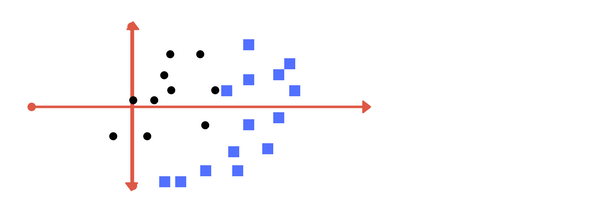

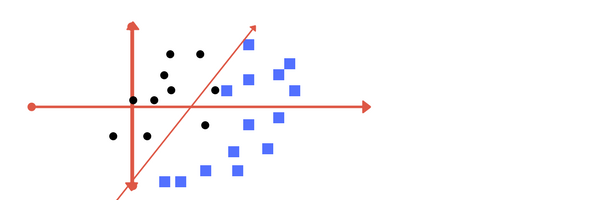
Solution 1

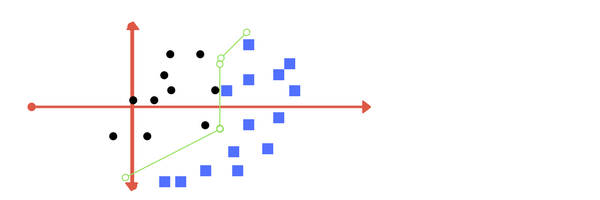
Solution 2

Which one do you think is correct? Well, both answers are correct. The first one tolerates some outlier points. The second one is trying to achieve 0 tolerance with perfect partition.

__But, there is a tradeoff__., In real wolrd application, finding perfect class for millions of training data set takes a lot of time. This is called __regularization parameter__. The __regularization parameter__ and __gamma__ are tuning parameters in SVM classifier. Varying those, we can achieve considerable non-linear classification line with more accuracy in reasonable amount of time. One more parameters is __kernel__. 

## Tuning Parameters: Kernel, Regularization, Gamma and Margin

### Kernel

The leanirng of the hyperplane in linear SVM is done by transforming the problem using some linear algebra. This is where trhe kernel plays an important role. 

For __linear kernel__, the equation for prediction for a new input using the dot product between the input (x) and each support vector ($x_i$) is calculated as follows:
$f(x) = B_0 + \sum(a_i * (x, x_i))$

This is an equation that involves calculating the inner products of a new input vector (x) with all support vectors in training data. The coefficients $B_0$ and $a_i$ (for each input) must be estimated from the training data by the learning algorithm.

The __polynomial kernel__ can be written as $K(x, x_i) = 1 + \sum(x * x_i)^d$ and __exponential__ as $K(x, x_i) = \exp(-gamma * \sum(x - x_i)^2$ 

Polynomial and exponentional kernels calculates separation line in higher dimensions. This is called __kernel trick__.

### Regularization

The regularization parameter (often termed as C parameter in Python's sklearn library)tells the SVM optimization how much you want to avoid misclassifying each training example. 

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin eparating hyperplane , even if that hyperplane issclassifies more data points. 

The images below are two examples of different regularization parameter. First one has some misclassification due to lower regularization value. Higher regularization values leads to a separatrion similar to the second image.
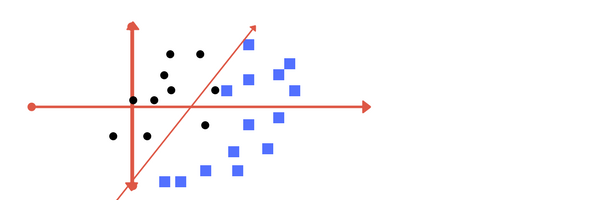
Low regularization value

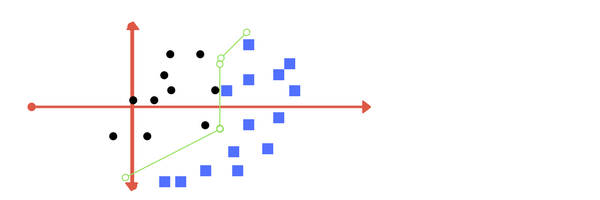
High regularization Value

### Gamma

The gamma parameters defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. In other words, with low gamma, points far away from plausible separation line are considered in calculation for the separation line. Whereas high gamma means the points close to plausible line are considered in calculation.
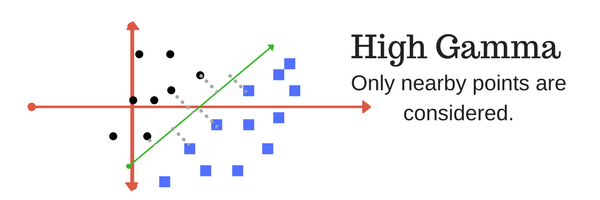

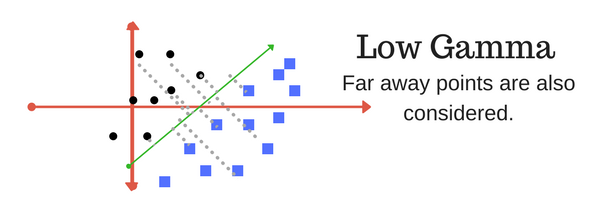

### Margin

A very imporetant parameter in the SVM classifier is the margin. __A margin is a separation of line to the closest class points__. A __good margin__ is one where the separation is larger for both the classes. A good margin allows the data points to be in their respective classes without crossing to other class. The images below shows the separation:
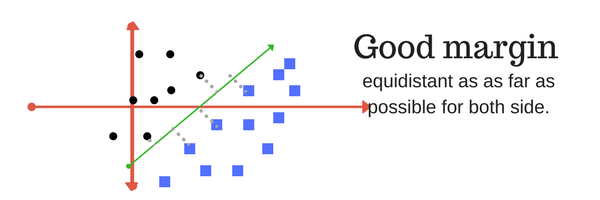

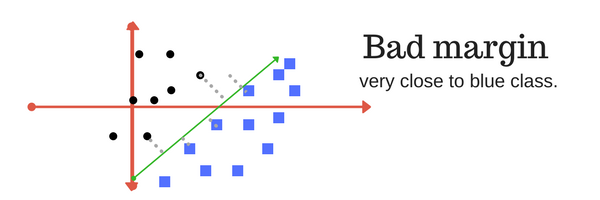

# Support Vector Machine (SVM) - Coding

## SVM Implementation in Python

The dataset we will be using to implement our SVM algorithm is the Iris dataset. 

In [1]:
# Lets read and view the data

import pandas as pd

df = pd.read_csv('/Users/ahmedahmed/Desktop/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
# Lets see our dataframe data types

df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [3]:
# Lets drop the id column 

df.drop(['I# d'], axis=1, inplace=True)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Lets save the target separately

target = df['Species']

target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [5]:
# Don't forget that SVM is most suitable for binary classification 

target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

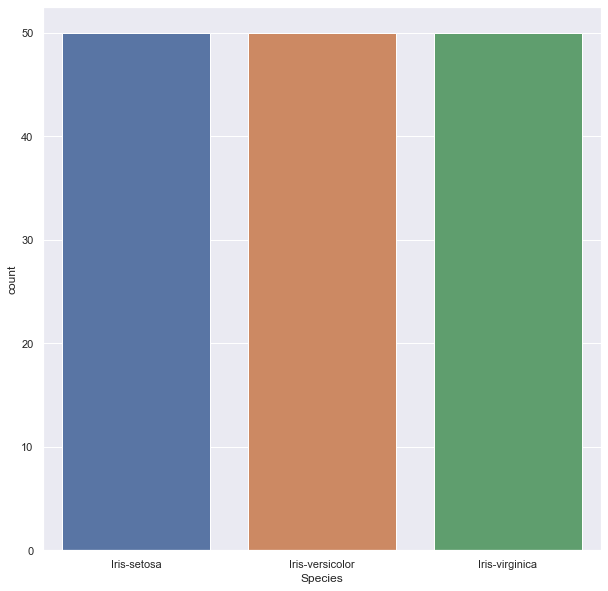

In [11]:
# Lets see how our targets are distributed 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(10,10))
sns.set()

sns.countplot(target)

In [14]:
# Our targets our distributed equally. We will drop the Iris-virginica class and its associated features

df = df[df['Species'] != 'Iris-virginica']
target = df['Species']

In [15]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [17]:
target.unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [18]:
df.shape

(100, 5)

In [19]:
target.shape

(100,)

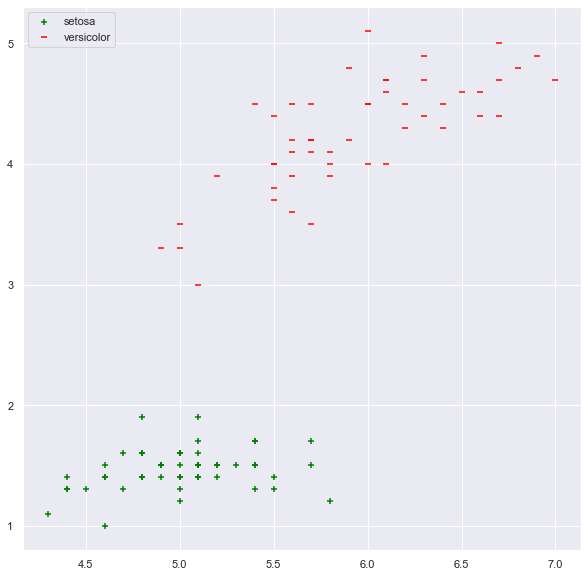

In [23]:
x = df['SepalLengthCm']
y = df['PetalLengthCm']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:]
versicolor_y = y[50:]

plt.figure(figsize=(10,10))
plt.scatter(setosa_x,setosa_y,marker='+',color='green', label='setosa')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red', label='versicolor')
plt.legend()
plt.show()

In [26]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
# Lets remove the target from our df

X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = target

In [28]:
# Lets split our data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 4)
(20, 4)
(80,)
(20,)


In [38]:
# Lets use the sklearn library and import our machine learning model and our evaluation metrics

from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



The classification shows that our machine leanring model (Support Vector Machine) is performing with an accuracy of 1.0